In [1]:
!pip install sagemaker --upgrade
!pip install roboflow pycocotools seaborn
!pip install boto3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 58.6 MB/s eta 0:00:00
  Attempting uninstall: sagemaker
    Found existing installation: sagemaker 2.212.0
    Uninstalling sagemaker-2.212.0:
      Successfully uninstalled sagemaker-2.212.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.1/74.1 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 42.3 MB/s eta 0:00:0000:01:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.2/426.2 kB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 13.5 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
    

### Load and Prep. Dataset

In [2]:
!unzip ./dataset_v3.zip -d ./

Archive:  ./dataset_v3.zip
   creating: ./dataset_v3/
  inflating: ./dataset_v3/classes.txt  
   creating: ./dataset_v3/test/
   creating: ./dataset_v3/test/annotations/
  inflating: ./dataset_v3/test/annotations/23_Dec_East_Electric_WhatsApp Image 2023-12-24 at 06.29.53_crop_83_56.txt  
  inflating: ./dataset_v3/test/annotations/23_Dec_East_Electric_WhatsApp Image 2023-12-24 at 06.38.38 (2)_crop_47_54.txt  
  inflating: ./dataset_v3/test/annotations/23_Dec_East_Electric_WhatsApp Image 2023-12-24 at 06.40.56_crop_29_34.txt  
  inflating: ./dataset_v3/test/annotations/23_Dec_East_Electric_WhatsApp Image 2023-12-24 at 06.52.32_crop_30_39.txt  
  inflating: ./dataset_v3/test/annotations/23_Dec_East_Electric_WhatsApp Image 2023-12-24 at 06.54.07_crop_30_34.txt  
  inflating: ./dataset_v3/test/annotations/23_Dec_East_Electric_WhatsApp Image 2023-12-24 at 06.56.04_crop_52_62.txt  
  inflating: ./dataset_v3/test/annotations/23_Dec_East_Electric_WhatsApp Image 2023-12-24 at 06.57.56_crop_34_30

In [3]:
!mkdir -p ./data/custom
!mkdir -p ./data/custom/annotations/

!mv ./dataset_v3/test.json ./data/custom/annotations/custom_val.json
!mv ./dataset_v3/train.json ./data/custom/annotations/custom_train.json

!mkdir -p ./data/custom/train2017/
!mv ./dataset_v3/train/images/*.jpg ./data/custom/train2017/

!mkdir -p ./data/custom/val2017/
!mv ./dataset_v3/test/images/*.jpg ./data/custom/val2017/

### Test & Vis. Annotated dataset

In [4]:
%matplotlib inline
import pycocotools.coco as coco
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [5]:
dataDir='./data/custom'
dataType='train2017'
annFile='{}/annotations/custom_train.json'.format(dataDir)

In [6]:
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.08s)
creating index...
index created!


In [7]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())

nms=[cat['name'] for cat in cats]
print('Categories: {}'.format(nms))

nms = set([cat['supercategory'] for cat in cats])
print('Super-categories: {}'.format(nms))

Categories: ['Electricity Meter', 'Water Meter', 'Tenant Number', 'Meter Reading', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '-', '.', 'E', 'A', 'B', 'C', 'D', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
Super-categories: {'object'}


Image n°873
Image name: ./data/custom/train2017/23_Sept_East_Water_WhatsApp Image 2023-09-22 at 23.55.17 (1).jpg
[{'id': 12161, 'image_id': 873, 'category_id': 14, 'bbox': [275, 158, 29, 11], 'area': 339889, 'segmentation': [], 'iscrowd': 0}, {'id': 12162, 'image_id': 873, 'category_id': 14, 'bbox': [355, 161, 28, 14], 'area': 339889, 'segmentation': [], 'iscrowd': 0}]


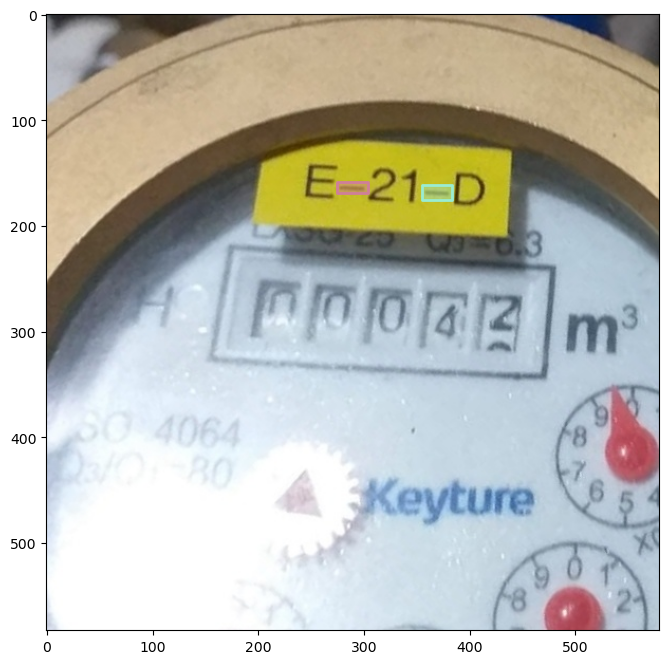

In [8]:
# load and display image
catIds = coco.getCatIds(catNms=['-'])
imgIds = coco.getImgIds(catIds=catIds)

img_id = imgIds[np.random.randint(0,len(imgIds))]
print('Image n°{}'.format(img_id))

img = coco.loadImgs(img_id)[0]

img_name = '%s/%s/%s'%(dataDir, dataType, img['file_name'])
print('Image name: {}'.format(img_name))

annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds)
anns = coco.loadAnns(annIds)
print(anns)

I = io.imread(img_name)
plt.imshow(I)
coco.showAnns(anns, draw_bbox=True, )

### Loading code base

In [10]:
!git clone https://github.com/ixd-ai-hub/meter-reader-ai-model.git --branch detr_train
!mv ./meter-reader-ai-model/* .
!rm -rf meter-reader-ai-model

Cloning into 'meter-reader-ai-model'...
remote: Enumerating objects: 263, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 263 (delta 4), reused 5 (delta 3), pack-reused 253
Receiving objects: 100% (263/263), 324.61 KiB | 4.01 MiB/s, done.
Resolving deltas: 100% (126/126), done.
